<h1>Practicing with tagleaf_lims database using SQL queries</h1>

In [455]:
import numpy as np
import pandas as pd
import psycopg2
import sqlalchemy

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

<h2>Setting up database connection</h2>

In [236]:
from sqlalchemy import create_engine

POSTGRES_ADDRESS = '192.168.160.111'

POSTGRES_PORT = '5432' 

POSTGRES_USERNAME = 'postgres'

POSTGRES_PASSWORD = 'jabicopostgres112000'

POSTGRES_DBNAME = 'tagleaf_lims'

# A long string that contains the necessary Postgres login information
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
               .format(username=POSTGRES_USERNAME,
                password=POSTGRES_PASSWORD,
                ipaddress=POSTGRES_ADDRESS,
                port=POSTGRES_PORT,
                dbname=POSTGRES_DBNAME))
#Create the connection

cnx = create_engine(postgres_str)

<h2>Getting familiar with turning queries into dataframes</h2>

In [5]:
pd.read_sql_query('''SELECT * FROM samples LIMIT 5;''', cnx)

,id,sample_submission_id,quantity,quantity_type_id,sample_status_id,properties,created_at,updated_at,deleted_at,_lft,_rgt,parent_id,lab_sample_submission_id,meta
0,98800,18446.0,0,38,58,None,2019-08-26 16:56:28,2019-08-26 16:56:28,None,13,14,None,NaN,None
1,98801,18447.0,0,38,58,None,2019-08-26 16:56:28,2019-08-26 16:56:28,None,13,14,None,NaN,None
2,98802,18448.0,0,38,58,None,2019-08-26 16:56:28,2019-08-26 16:56:28,None,13,14,None,NaN,None
3,117638,NaN,0,38,58,None,2019-09-24 15:42:58,2019-09-24 15:42:58,None,1015,1016,None,1600.0,None
4,117639,NaN,0,38,58,None,2019-09-24 15:42:58,2019-09-24 15:42:58,None,1017,1018,None,1600.0,None


In [67]:
pd.read_sql_query('''SELECT * FROM coa_events WHERE sample_submission_id = 18446.0;''', cnx)

,id,user_id,sample_submission_id,coa_status_id,coa_id,extra,created_at,deleted_at
0,37904,261,18446,142,31164,None,2019-08-27 17:19:15,None
1,37921,5,18446,143,31164,None,2019-08-27 17:57:35,None
2,37922,5,18446,144,31164,None,2019-08-27 17:57:46,None
3,37923,5,18446,145,31164,{'email': 'Sebastian@glasshousebrands.com'},2019-08-27 17:57:48,None


In [72]:
pd.read_sql_query('''SELECT DISTINCT sample_submission_id FROM coa_events WHERE coa_id = 37743;''', cnx)

,sample_submission_id
0,20963


In [6]:
pd.read_sql_query('''SELECT * FROM coas LIMIT 5;''', cnx)

,id,creator_id,sample_submission_id,compliance_version,coa_data,created_at,updated_at,deleted_at,is_revision,completed_at,...,approver_id,for_compliance,detection_limits,coa_version,published_at,pass_data,signature_data,properties,lab_info,accreditation_id
0,37743,5,20963,2019-01-17,{'water_activity_test': [{'module': 'water_act...,2019-10-23 17:29:01,2019-10-23 17:29:40,NaT,False,2019-10-23 17:29:24,...,5.0,True,{'water_activity_test': {'Water Activity': Non...,2,2019-10-23 17:29:40,"{'water_activity_test': True, 'heavy_metal_tes...",{'img': 'tenant_files/belcosta-labs/img/signat...,{'report_dry_weight': True},"{'zip': '90805', 'address': '1131 E. South Str...",2
1,37739,608,21160,2019-01-17,{'pesticide_test': [{'module': 'pesticide_test...,2019-10-23 14:18:02,2019-10-23 17:32:26,2019-10-23 17:32:26,False,NaT,...,NaN,True,{'pesticide_test': {'Tebuconazole': {'LOD': {'...,2,NaT,"{'overall': False, 'pesticide_test': False, 'm...",{'img': 'tenant_files/belcosta-labs/img/signat...,{'report_dry_weight': False},"{'zip': '90805', 'address': '1131 E. South Str...",2
2,206,2,162,2018-01-01,{'cannabinoid_test': {'module': 'cannabinoid_t...,2018-06-08 20:14:17,2018-06-08 20:14:17,NaT,False,NaT,...,NaN,True,{'cannabinoid_test': {'THC': {'LOD': {'units':...,1,NaT,"{'cannabinoid_test': None, 'overall': True}",{'img': 'tenant_files/belcosta-labs/img/signat...,None,"{'zip': '90805', 'address': '1131 E. South Str...",1
3,4419,2,2810,2018-07-01,{'cannabinoid_test': {'module': 'cannabinoid_t...,2018-08-09 02:11:11,2018-09-27 07:08:07,2018-09-27 07:08:07,False,NaT,...,NaN,True,{'cannabinoid_test': {'THC': {'LOD': {'units':...,1,NaT,None,{'img': 'tenant_files/belcosta-labs/img/signat...,None,"{'zip': '90805', 'address': '1131 E. South Str...",1
4,4420,2,2811,2018-07-01,{'cannabinoid_test': {'module': 'cannabinoid_t...,2018-08-09 02:11:38,2018-09-27 07:08:07,2018-09-27 07:08:07,False,NaT,...,NaN,True,{'cannabinoid_test': {'THC': {'LOD': {'units':...,1,NaT,None,{'img': 'tenant_files/belcosta-labs/img/signat...,None,"{'zip': '90805', 'address': '1131 E. South Str...",1


In [39]:
def CustomParser(data):
    import json
    j1 = json.loads(data)
    return j1

<h4>Discovering there is no need for custom parsers to deal with JSON strings, because the database already hold the formatting information, and the <em>read_sql_query</em> already knows how to handle these data types</h4>

In [337]:
#df = pd.read_sql_query('''SELECT * FROM coas;''', cnx, converters={'coa_data':CustomParser}, header=0)
df = pd.read_sql_query('''SELECT coa_data FROM coas where deleted_at is null;''', cnx)

In [338]:
df.shape

(18506, 1)

In [83]:
coa_data = df.coa_data[0]
print(type(coa_data))
print(coa_data.keys())
print('pesticide_test' in coa_data.keys())

<class 'dict'>
dict_keys(['water_activity_test', 'heavy_metal_test', 'microbial_test', 'foreign_material_test', 'cannabinoid_test', 'pesticide_test', 'moisture_test', 'mycotoxin_test'])
True


In [56]:
print(type(coa_data))
canna_results = coa_data['cannabinoid_test'][0]['results']

<class 'dict'>


In [57]:
#coa_data = pd.io.json.json_normalize(json.dumps(df.coa_data))
#df = pd.DataFrame.from_dict(coa_data)
df = pd.DataFrame.from_dict(canna_results)

In [59]:
df.head()

,CBC,CBCA,CBD,CBDA,CBDV,CBDVA,CBG,CBGA,CBN,Delta-8-THC,Delta-9-THC,THCA,THCV,THCVA,Total CBD,Total THC
amount,0.05203,0.14793,0,0.04166,0,0,0.1243,0.34842,0.17462,0,4.45027,12.9859,0,0.07786,0.0365358,15.8389
analyte,CBC,CBCA,CBD,CBDA,CBDV,CBDVA,CBG,CBGA,CBN,Delta-8-THC,Delta-9-THC,THCA,THCV,THCVA,Total CBD,Total THC
detection_limits,"{'LOD': {'units': 'mg/g', 'amount': 0.025}, 'L...","{'LOD': {'units': 'mg/g', 'amount': 0.025}, 'L...","{'LOD': {'units': 'mg/g', 'amount': 0.025}, 'L...","{'LOD': {'units': 'mg/g', 'amount': 0.025}, 'L...","{'LOD': {'units': 'mg/g', 'amount': 0.025}, 'L...","{'LOD': {'units': 'mg/g', 'amount': 0.025}, 'L...","{'LOD': {'units': 'mg/g', 'amount': 0.025}, 'L...","{'LOD': {'units': 'mg/g', 'amount': 0.025}, 'L...","{'LOD': {'units': 'mg/g', 'amount': 0.025}, 'L...","{'LOD': {'units': 'mg/g', 'amount': 0.025}, 'L...","{'LOD': {'units': 'mg/g', 'amount': 0.025}, 'L...","{'LOD': {'units': 'mg/g', 'amount': 0.025}, 'L...","{'LOD': {'units': 'mg/g', 'amount': 0.025}, 'L...","{'LOD': {'units': 'mg/g', 'amount': 0.025}, 'L...",[],[]
passed,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
units,%,%,%,%,%,%,%,%,%,%,%,%,%,%,%,%


In [60]:
coa_data

{'cannabinoid_test': [{'base_test_type_id': 3,
   'method_stages': {'data_review': {'date': None, 'user_id': None},
    'final_approval': {'date': '2019-10-23', 'user_id': 5},
    'sample_analysis': {'date': '2019-10-19', 'user_id': None},
    'sample_preparation': {'date': None, 'user_id': None}},
   'module': 'cannabinoid_test',
   'results': {'CBC': {'amount': 0.05203,
     'analyte': 'CBC',
     'detection_limits': {'LOD': {'amount': 0.025, 'units': 'mg/g'},
      'LOQ': {'amount': 0.1, 'units': 'mg/g'}},
     'passed': None,
     'units': '%'},
    'CBCA': {'amount': 0.14793,
     'analyte': 'CBCA',
     'detection_limits': {'LOD': {'amount': 0.025, 'units': 'mg/g'},
      'LOQ': {'amount': 0.1, 'units': 'mg/g'}},
     'passed': None,
     'units': '%'},
    'CBD': {'amount': 0,
     'analyte': 'CBD',
     'detection_limits': {'LOD': {'amount': 0.025, 'units': 'mg/g'},
      'LOQ': {'amount': 0.1, 'units': 'mg/g'}},
     'passed': None,
     'units': '%'},
    'CBDA': {'amount': 0

In [61]:
foreign_mat_results = coa_data['foreign_material_test'][0]['results']

In [64]:
df_for_mat_res = pd.DataFrame.from_dict(foreign_mat_results)
df_for_mat_res.head()

,Cinders,Dirt,Imbedded Foreign Material,Insect Fragments,Mammal Excrement,Mold,Rodent Hair,Sand,Soil
amount,0,0,0,0,0,0,0,0,0
analyte,Cinders,Dirt,Imbedded Foreign Material,Insect Fragments,Mammal Excrement,Mold,Rodent Hair,Sand,Soil
detection_limits,None,None,None,None,None,None,None,None,None
passed,True,True,True,True,True,True,True,True,True
units,%,%,%,Units,Units,%,Units,%,%


<h3>Exercise 1:</h3> </br>
<p> Take all the coas and pull out the cannabinoid test results, if any, and make a new dataframe contianing amounts of all analytes as columns and each sample with these kind of test results as the rows</p>

<ul>
<li>Apply mask to keep only results with "cannabinoid test" in the coa_data dict --> results</li>
<li>Maybe loop through coa_data df and append new df with flattened rows</li>
<li>This might take too long, look for faster methods</li>
</ul>

In [89]:
#canna_mask = (df['coa_data'].has_key('cannabinoid_test'))
type(df['coa_data'])


pandas.core.series.Series

In [339]:
canna_keys = (df['coa_data'][0].keys())
canna_keys

dict_keys(['water_activity_test', 'heavy_metal_test', 'microbial_test', 'foreign_material_test', 'cannabinoid_test', 'pesticide_test', 'moisture_test', 'mycotoxin_test'])

In [243]:
canna_list = []
for index, row in df.iterrows():
    print('index:', index)
    print('row:', type(row))
    print('row[0]:', type(row['coa_data']))
    print('row[1]', row['has_cannabinoid_test'])
    print('cannabinoid_test' in row[0])
    if index == 1:
        print(row['coa_data'])
    canna_list.append('cannabinoid_test' in row[0])

index: 0
row: <class 'pandas.core.series.Series'>
row[0]: <class 'dict'>
row[1] True
True
index: 1
row: <class 'pandas.core.series.Series'>
row[0]: <class 'dict'>
row[1] False
False
{'pesticide_test': [{'module': 'pesticide_test', 'method_stages': {'final_approval': {'user_id': 350, 'date': '2019-10-22'}, 'data_review': {'user_id': 542, 'date': '2019-10-22'}, 'sample_preparation': {'user_id': 636, 'date': '2019-10-21'}, 'sample_analysis': {'user_id': 528, 'date': '2019-10-22'}}, 'test_name': 'BCL-05: Residual Pesticide Analysis by LC-MS/MS ESI', 'test_type_id': 20, 'results': {'Tebuconazole': {'passed': False, 'units': 'µg/g', 'amount': 6.0129, 'detection_limits': {'LOD': {'units': 'µg/g', 'amount': 0.03}, 'LOQ': {'units': 'µg/g', 'amount': 0.05}}, 'analyte': 'Tebuconazole'}, 'Bifenazate': {'passed': False, 'units': 'µg/g', 'amount': 2.9207, 'detection_limits': {'LOD': {'units': 'µg/g', 'amount': 0.03}, 'LOQ': {'units': 'µg/g', 'amount': 0.05}}, 'analyte': 'Bifenazate'}, 'Chlorantranil

In [119]:
print(canna_list)

[True, False, True, True, True, False, True, True, True, False]


In [120]:
canna_mask = pd.Series(canna_list)
canna_mask

0     True
1    False
2     True
3     True
4     True
5    False
6     True
7     True
8     True
9    False
dtype: bool

In [121]:
df['has_cannabinoid_test'] = (canna_mask)

In [340]:
df

,coa_data
0,{'water_activity_test': [{'module': 'water_act...
1,{'cannabinoid_test': {'module': 'cannabinoid_t...
2,{'water_activity_test': [{'module': 'water_act...
3,{'water_activity_test': [{'module': 'water_act...
4,{'pesticide_test': [{'module': 'pesticide_test...
5,{'water_activity_test': [{'module': 'water_act...
6,{'pesticide_test': [{'module': 'pesticide_test...
7,{'water_activity_test': [{'module': 'water_act...
8,{'cannabinoid_test': {'module': 'cannabinoid_t...
9,{'cannabinoid_test': {'module': 'cannabinoid_t...


In [124]:
df_canna = df[(df['has_cannabinoid_test'] == True)]
df_canna

,coa_data,has_cannabinoid_test
0,{'water_activity_test': [{'module': 'water_act...,True
2,{'cannabinoid_test': {'module': 'cannabinoid_t...,True
3,{'cannabinoid_test': {'module': 'cannabinoid_t...,True
4,{'cannabinoid_test': {'module': 'cannabinoid_t...,True
6,{'cannabinoid_test': {'module': 'cannabinoid_t...,True
7,{'water_activity_test': [{'module': 'water_act...,True
8,{'cannabinoid_test': {'module': 'cannabinoid_t...,True


In [229]:
df_canna_results = pd.DataFrame()

In [162]:
for index, row in df_canna.iterrows():
    print(type(row['coa_data']['cannabinoid_test']))
    #if(type(row['coa_data']['cannabinoid_test']) is dict):
    print(row['coa_data']['cannabinoid_test'])

<class 'list'>
[{'module': 'cannabinoid_test', 'method_stages': {'final_approval': {'user_id': 5, 'date': '2019-10-23'}, 'data_review': {'user_id': None, 'date': None}, 'sample_preparation': {'user_id': None, 'date': None}, 'sample_analysis': {'user_id': None, 'date': '2019-10-19'}}, 'test_name': 'BCL-03: Cannabinoid Potency by HPLC-UV', 'test_type_id': 3, 'results': {'Total CBD': {'passed': None, 'units': '%', 'amount': 0.036535820000000004, 'detection_limits': [], 'analyte': 'Total CBD'}, 'CBDV': {'passed': None, 'units': '%', 'amount': 0, 'detection_limits': {'LOD': {'units': 'mg/g', 'amount': 0.025}, 'LOQ': {'units': 'mg/g', 'amount': 0.1}}, 'analyte': 'CBDV'}, 'Delta-9-THC': {'passed': None, 'units': '%', 'amount': 4.45027, 'detection_limits': {'LOD': {'units': 'mg/g', 'amount': 0.025}, 'LOQ': {'units': 'mg/g', 'amount': 0.1}}, 'analyte': 'Delta-9-THC'}, 'CBGA': {'passed': None, 'units': '%', 'amount': 0.34842, 'detection_limits': {'LOD': {'units': 'mg/g', 'amount': 0.025}, 'LOQ':

In [234]:
for index, row in df_canna.iterrows():
    is_dict = type(row['coa_data']['cannabinoid_test']) is dict
    #print(is_dict)
    canna_results = row['coa_data']['cannabinoid_test']['results'] if is_dict else row['coa_data']['cannabinoid_test'][0]['results']
    #print(canna_results)
    temp_df = pd.DataFrame.from_dict(canna_results)
    temp_df = temp_df[temp_df.index == 'amount'].reset_index()
    df_canna_results = df_canna_results.append(temp_df, ignore_index = True)
print(df_canna_results)


        CBC     CBCA CBD CBD Per Package     CBDA CBDV CBDVA      CBG  \
0   0.05203  0.14793   0             NaN  0.04166    0     0   0.1243   
1       NaN      NaN   0             NaN        0  NaN   NaN        0   
2     1.299        0   0             NaN        0    0     0     2.13   
3     1.316        0   0             NaN        0    0     0     2.13   
4         0        0   0             NaN        0    0     0        0   
5   0.03536   0.1916   0               0  0.06608    0     0  0.06765   
6       NaN      NaN   0             NaN        0  NaN   NaN    1.294   
7   0.05203  0.14793   0             NaN  0.04166    0     0   0.1243   
8       NaN      NaN   0             NaN        0  NaN   NaN        0   
9     1.299        0   0             NaN        0    0     0     2.13   
10    1.316        0   0             NaN        0    0     0     2.13   
11        0        0   0             NaN        0    0     0        0   
12  0.03536   0.1916   0               0  0.06608  

/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [232]:
df_canna_results.describe()

,CBC,CBCA,CBD,CBD Per Package,CBDA,CBDV,CBDVA,CBG,CBGA,CBN,...,Delta-9-THC,Delta-9-THC Per Package,THC,THCA,THCV,THCVA,Total CBD,Total THC,Total THC Per Package,index
count,5.00000,5.0,7,1,7.0,5,5,7.00,5.0,7.0,...,6.000,1,1,7.0,5,5.0,3.000000,3.000000,1,7
unique,5.00000,3.0,1,1,3.0,1,1,5.00,4.0,5.0,...,6.000,1,1,6.0,1,4.0,3.000000,3.000000,1,1
top,0.03536,0.0,0,0,0.0,0,0,2.13,0.0,0.0,...,33.497,50.75,0,0.0,0,0.0,0.057952,15.838931,778.08,amount
freq,1.00000,3.0,7,1,5.0,5,5,2.00,2.0,3.0,...,1.000,1,1,2.0,5,2.0,1.000000,1.000000,1,7


In [226]:
import pickle as pkl


In [227]:
df.to_pickle("./coa_data.pkl")

In [233]:
test = pd.read_pickle("./coa_data.pkl")


<h4>Now let's make a flat dataframe with cannabinoid test results including all rows of data and save it for future use</h4>

In [342]:
#df_data = pd.read_sql_query('''SELECT coa_data FROM coas;''', cnx)
df_data = df

In [344]:
#df_data.describe()
df_data.shape

(18506, 1)

In [345]:
df_data.to_pickle("./coa_data.pkl")

<h5>Loop over dataframe and create a masks to determine with entries have which test results</h5>
<ul>
    <li>cannabinoid test</li>
    <li>terpenoid_test</li>
    <li>pesticide_test</li>
    <li>residual_solvent_test</li>
    <li>heavy_metal_test</li>
    <li>microbial_test</li>
    <li>mycotoxin_test</li>
    <li>foreign_material_test</li>
    <li>homogeneity_test</li>
    <li>moisture_test</li>
    <li>water_activity_test</li>
</ul>

In [346]:
cannabinoid_test_list = []
terpenoid_test_list = []
pesticide_test_list = []
residual_solvent_test_list = []
heavy_metal_test_list = []
microbial_test_list = []
mycotoxin_test_list = []
foreign_material_test_list = []
homogeneity_test_list = []
moisture_test_list = []
water_activity_test_list = []

for index, row in df_data.iterrows():
    cannabinoid_test_list.append('cannabinoid_test' in row[0])
    terpenoid_test_list.append('terpenoid_test' in row[0])
    pesticide_test_list.append('pesticide_test' in row[0])
    residual_solvent_test_list.append('residual_solvent_test' in row[0])
    heavy_metal_test_list.append('heavy_metal_test' in row[0])
    microbial_test_list.append('microbial_test' in row[0])
    mycotoxin_test_list.append('mycotoxin_test' in row[0])
    foreign_material_test_list.append('foreign_material_test' in row[0])
    homogeneity_test_list.append('homogeneity_test' in row[0])
    moisture_test_list.append('moisture_test' in row[0])
    water_activity_test_list.append('water_activity_test' in row[0])
    
#print('cannabinoid_test_list', cannabinoid_test_list)
#print('terpenoid_test_list', terpenoid_test_list)
#print('pesticide_test_list', pesticide_test_list)
#print('water_activity_test_list', water_activity_test_list)

<h5>Now convert lists in to pandas Series and add to dataframe</h5>

In [347]:
cannabinoid_test_mask = pd.Series(cannabinoid_test_list)
terpenoid_test_mask = pd.Series(terpenoid_test_list)
pesticide_test_mask = pd.Series(pesticide_test_list)
residual_solvent_test_mask = pd.Series(residual_solvent_test_list)
heavy_metal_test_mask = pd.Series(heavy_metal_test_list)
microbial_test_mask = pd.Series(microbial_test_list)
mycotoxin_test_mask = pd.Series(mycotoxin_test_list)
foreign_material_test_mask = pd.Series(foreign_material_test_list)
homogeneity_test_mask = pd.Series(homogeneity_test_list)
moisture_test_mask = pd.Series(moisture_test_list)
water_activity_test_mask = pd.Series(water_activity_test_list)

df_data['has_cannabinoid_test'] = (cannabinoid_test_mask)
df_data['has_terpenoid_test'] = (terpenoid_test_mask)
df_data['has_pesticide_test'] = (pesticide_test_mask)
df_data['has_residual_solvent_test'] = (residual_solvent_test_mask)
df_data['has_heavy_metal_test'] = (heavy_metal_test_mask)
df_data['has_microbial_test'] = (microbial_test_mask)
df_data['has_mycotoxin_test'] = (mycotoxin_test_mask)
df_data['has_foreign_material_test'] = (foreign_material_test_mask)
df_data['has_homogeneity_test'] = (homogeneity_test_mask)
df_data['has_moisture_test'] = (moisture_test_mask)
df_data['has_water_activity_test'] = (water_activity_test_mask)

In [348]:
df_data.describe()

,coa_data,has_cannabinoid_test,has_terpenoid_test,has_pesticide_test,has_residual_solvent_test,has_heavy_metal_test,has_microbial_test,has_mycotoxin_test,has_foreign_material_test,has_homogeneity_test,has_moisture_test,has_water_activity_test
count,18506,18506,18506,18506,18506,18506,18506,18506,18506,18506,18506,18506
unique,17086,2,2,2,2,2,2,2,2,2,2,2
top,{'pesticide_test': {'module': 'pesticide_test'...,True,False,True,False,False,False,False,False,False,False,False
freq,25,13476,16687,13036,14588,12046,10879,13100,11870,18488,13644,15453


In [350]:
#df_data = df_data.drop_duplicates()

<h5>Saving dataframe as pickle object to be picked up and used in others scripts or notebooks</h5>

In [351]:
df_data.to_pickle("./coa_data.pkl")

<h5>Now make new dataframe including only entries containing cannabinoid test results, then flatten to only contain measured analyte amounts for each coa</h5>

In [352]:
df_cannabinoid_test = df_data[(df_data['has_cannabinoid_test'] == True)]

In [353]:
df_cannabinoid_test = df_cannabinoid_test.reset_index()
df_cannabinoid_test.head()

,index,coa_data,has_cannabinoid_test,has_terpenoid_test,has_pesticide_test,has_residual_solvent_test,has_heavy_metal_test,has_microbial_test,has_mycotoxin_test,has_foreign_material_test,has_homogeneity_test,has_moisture_test,has_water_activity_test
0,0,{'water_activity_test': [{'module': 'water_act...,True,False,True,False,True,True,True,True,False,True,True
1,1,{'cannabinoid_test': {'module': 'cannabinoid_t...,True,False,False,False,False,False,False,False,False,False,False
2,2,{'water_activity_test': [{'module': 'water_act...,True,True,True,False,True,True,True,True,False,True,True
3,3,{'water_activity_test': [{'module': 'water_act...,True,True,True,False,True,True,True,True,False,True,True
4,5,{'water_activity_test': [{'module': 'water_act...,True,True,True,True,True,True,True,True,False,True,True


In [354]:
df_cannabinoid_test = df_cannabinoid_test.drop('index', axis=1)

In [355]:
#df_cannabinoid_test.describe()
df_cannabinoid_test.head()

,coa_data,has_cannabinoid_test,has_terpenoid_test,has_pesticide_test,has_residual_solvent_test,has_heavy_metal_test,has_microbial_test,has_mycotoxin_test,has_foreign_material_test,has_homogeneity_test,has_moisture_test,has_water_activity_test
0,{'water_activity_test': [{'module': 'water_act...,True,False,True,False,True,True,True,True,False,True,True
1,{'cannabinoid_test': {'module': 'cannabinoid_t...,True,False,False,False,False,False,False,False,False,False,False
2,{'water_activity_test': [{'module': 'water_act...,True,True,True,False,True,True,True,True,False,True,True
3,{'water_activity_test': [{'module': 'water_act...,True,True,True,False,True,True,True,True,False,True,True
4,{'water_activity_test': [{'module': 'water_act...,True,True,True,True,True,True,True,True,False,True,True


In [356]:
df_cannabinoid_test_data = pd.DataFrame()
not_included = 0
for index, row in df_cannabinoid_test.iterrows():
    is_dict = type(row['coa_data']['cannabinoid_test']) is dict
    #print('is_dict', is_dict)
    canna_results = row['coa_data']['cannabinoid_test']['results'] if is_dict else row['coa_data']['cannabinoid_test'][0]['results']
    #print(canna_results)
    if (type(canna_results) is not dict):
        not_included += 1
        continue
    temp_df = pd.DataFrame.from_dict(canna_results)
    temp_df = temp_df[temp_df.index == 'amount'].reset_index()
    #print(temp_df)    
    df_cannabinoid_test_data = df_cannabinoid_test_data.append(temp_df, ignore_index = True)
print(not_included)
print(df_cannabinoid_test_data.head())


/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


3
       CBC     CBCA CBD CBD Per Package CBD Per Serving     CBDA CBDV CBDVA  \
0  0.05203  0.14793   0             NaN             NaN  0.04166    0     0   
1      NaN      NaN   0             NaN             NaN        0  NaN   NaN   
2  0.03536   0.1916   0               0             NaN  0.06608    0     0   
3  0.03095  0.17408   0               0             NaN  0.05445    0     0   
4  0.03728  0.12468   0               0             NaN  0.04386    0     0   

       CBG     CBGA   ...   THCA Per Package THCA Per Serving THCV    THCVA  \
0   0.1243  0.34842   ...                NaN              NaN    0  0.07786   
1        0      NaN   ...                NaN              NaN  NaN      NaN   
2  0.06765  0.78929   ...                NaN              NaN    0  0.12596   
3   0.0442  0.25094   ...                NaN              NaN    0  0.08082   
4  0.06691  0.33667   ...                NaN              NaN    0  0.09024   

   Total CBD Total CBD Per Serving Total THC Tot

In [363]:
df_cannabinoid_test_data.drop_duplicates()

,CBC,CBCA,CBD,CBD Per Package,CBD Per Serving,CBDA,CBDV,CBDVA,CBG,CBGA,...,THCA Per Package,THCA Per Serving,THCV,THCVA,Total CBD,Total CBD Per Serving,Total THC,Total THC Per Package,Total THC Per Serving,index
0,0.05203,0.14793,0,NaN,NaN,0.04166,0,0,0.1243,0.34842,...,NaN,NaN,0,0.07786,0.0365358,NaN,15.8389,NaN,NaN,amount
1,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,1.56,NaN,NaN,amount
2,0.03536,0.1916,0,0,NaN,0.06608,0,0,0.06765,0.78929,...,NaN,NaN,0,0.12596,0.0579522,NaN,22.231,778.08,NaN,amount
3,0.03095,0.17408,0,0,NaN,0.05445,0,0,0.0442,0.25094,...,NaN,NaN,0,0.08082,0.0477527,NaN,16.8868,591.04,NaN,amount
4,0.03728,0.12468,0,0,NaN,0.04386,0,0,0.06691,0.33667,...,NaN,NaN,0,0.09024,0.0384652,NaN,15.1471,530.15,NaN,amount
5,0.04242,0.35812,0,0,NaN,0.05627,0,0,0.10411,0.41703,...,NaN,NaN,0,0.09226,0.0493488,NaN,17.6426,617.49,NaN,amount
6,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,14.0189,NaN,NaN,amount
7,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,19.9771,NaN,NaN,amount
8,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,24.2267,NaN,NaN,amount
9,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,72.7268,NaN,NaN,amount


In [364]:
df_cannabinoid_test_data = df_cannabinoid_test_data.drop_duplicates()

In [365]:
df_cannabinoid_test_data.describe()

,CBC,CBCA,CBD,CBD Per Package,CBD Per Serving,CBDA,CBDV,CBDVA,CBG,CBGA,...,THCA Per Package,THCA Per Serving,THCV,THCVA,Total CBD,Total CBD Per Serving,Total THC,Total THC Per Package,Total THC Per Serving,index
count,13206,13206,13430,1342,992,13429,13205,13205,13429,13206,...,1.00,1.00,13206,13206,13423.0,1.00,13425,722,62,13431
unique,4111,3079,3242,587,333,2939,433,531,5847,5395,...,1.00,1.00,970,2700,5105.0,1.00,12453,664,55,1
top,0,0,0,0,0,0,0,0,0,0,...,236.66,15.78,0,0,0.0,26.25,0,0,0,amount
freq,7838,9985,10096,716,640,10140,12697,12602,6116,6357,...,1.00,1.00,12190,10247,8083.0,1.00,687,51,8,13431


In [366]:
df_cannabinoid_test_data.to_pickle('./cannabinoid_test_data.pkl')

<h5>Pull cannabinoid_test_results dataframe from pkl</h5>

In [367]:
df_cannabinoid_test_results = pd.read_pickle('./cannabinoid_test_data.pkl')

In [368]:
df_cannabinoid_test_results.describe()

,CBC,CBCA,CBD,CBD Per Package,CBD Per Serving,CBDA,CBDV,CBDVA,CBG,CBGA,...,THCA Per Package,THCA Per Serving,THCV,THCVA,Total CBD,Total CBD Per Serving,Total THC,Total THC Per Package,Total THC Per Serving,index
count,13206,13206,13430,1342,992,13429,13205,13205,13429,13206,...,1.00,1.00,13206,13206,13423.0,1.00,13425,722,62,13431
unique,4111,3079,3242,587,333,2939,433,531,5847,5395,...,1.00,1.00,970,2700,5105.0,1.00,12453,664,55,1
top,0,0,0,0,0,0,0,0,0,0,...,236.66,15.78,0,0,0.0,26.25,0,0,0,amount
freq,7838,9985,10096,716,640,10140,12697,12602,6116,6357,...,1.00,1.00,12190,10247,8083.0,1.00,687,51,8,13431


In [369]:
df_cannabinoid_test_results.shape

(13431, 30)

In [307]:
df_cannabinoid_test_results = df_cannabinoid_test_results.drop('index', axis=1)
df_cannabinoid_test_results.describe()

,CBC,CBCA,CBD,CBD Per Package,CBD Per Serving,CBDA,CBDV,CBDVA,CBG,CBGA,...,THCA,THCA Per Package,THCA Per Serving,THCV,THCVA,Total CBD,Total CBD Per Serving,Total THC,Total THC Per Package,Total THC Per Serving
count,29607,29607,30308,3617,1864,30307,29606,29606,30305,29607,...,30305,1.00,1.00,29606,29607,26428,1.00,26521,2010,157
unique,4458,3410,3656,763,419,3231,500,585,6434,5905,...,9373,1.00,1.00,1078,3038,5711,1.00,13658,791,80
top,0,0,0,0,0,0,0,0,0,0,...,0,236.66,15.78,0,0,0,26.25,0,0,0
freq,17993,21731,23305,2010,1200,22372,28553,28502,13513,13700,...,10242,1.00,1.00,27116,22004,14745,1.00,1353,70,16


In [308]:
#df_cannabinoid_test_results.fillna(-999999999)

In [370]:
for column in df_cannabinoid_test_results.columns:
    #print(str(column))
    #print(df_cannabinoid_test_results[column])
    df_cannabinoid_test_results[column].replace(['< LOQ', '<LOQ'], 0, inplace=True)

In [374]:
#df_cannabinoid_test_results.astype(float)
df_cannabinoid_test_results.dtypes

CBC                        float64
CBCA                       float64
CBD                         object
CBD Per Package             object
CBD Per Serving             object
CBDA                        object
CBDV                       float64
CBDVA                      float64
CBG                        float64
CBGA                       float64
CBN                        float64
Delta-8-THC                float64
Delta-9-THC                float64
Delta-9-THC Per Package     object
Delta-9-THC Per Serving     object
THC                         object
THC Per Package            float64
THC Per Serving            float64
THC:CBD Ratio               object
THCA                        object
THCA Per Package           float64
THCA Per Serving           float64
THCV                       float64
THCVA                      float64
Total CBD                  float64
Total CBD Per Serving      float64
Total THC                   object
Total THC Per Package       object
Total THC Per Servin

In [376]:
df_cannabinoid_test_results = df_cannabinoid_test_results.drop('index', axis=1)

In [379]:
df_cannabinoid_test_results['THC:CBD Ratio'].unique()

array([nan, '1 : 26.515', '1 : 1.098', '1 : 29.610', '2.685 : 1',
       '2.698 : 1', '2.790 : 1', '2.733 : 1', '1 : 1.213', '1 : 1.122',
       '1 : 3.297', '2.548 : 1', '1 : 1.105', '2.759 : 1', '2.431 : 1',
       '2.760 : 1', '2.840 : 1', '1.064 : 1', '1.326 : 1', '1 : 1.231',
       '1.066 : 1', '1 : 26.691', '1 : 30.040', '1 : 11.413', '1.461 : 1',
       '1 : 19.513', '1 : 3.885', '1 : 28.292', '1 : 10.245', '1 : 3.333',
       '1 : 1.013', '1 : 21.698', '1 : 2.815', '1.007 : 1', '1 : 22.940',
       '1.138 : 1', '1 : 21.944', '400 : ND', '64.751 : 1', '1 : 2.041',
       '1 : 1.653', '1 : 16.509', '1 : 20.947', '1 : 1.005', '415 : ND',
       '425 : ND', '840 : ND', '1 : 3.185', '1 : 2.021', '1 : 12.293',
       '1 : 24.050', '1 : 10.342', '1 : 3.782', '1 : 3.355', '1 : 1.038',
       '1 : 3.494', '1 : 3.769', '830 : ND', '1 : 31.125', '1 : 1.241',
       '1 : 11.119', '1 : 1.977', '1 : 10.144', '1 : 28.859', '2.982 : 1',
       '2.920 : 1', '1.059 : 1', '1 : 29.378', '1 : 5.37

In [417]:
THCtoCBDlist = []
for entry in df_cannabinoid_test_results['THC:CBD Ratio'].str.split():
    if type(entry) is not float:
        if entry[2] == 'ND':
            THCtoCBDlist.append(float(np.nan))
        else: THCtoCBDlist.append(float(entry[0])/float(entry[2]))
    else: THCtoCBDlist.append(entry)

data = np.array(THCtoCBDlist)
print(data)
THCtoCBD = pd.Series(THCtoCBDlist)

[ nan  nan  nan ...,  nan  nan  nan]


In [418]:
print(THCtoCBD)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29            NaN
           ...   
13401         NaN
13402         NaN
13403         NaN
13404         NaN
13405         NaN
13406         NaN
13407         NaN
13408         NaN
13409         NaN
13410         NaN
13411         NaN
13412         NaN
13413         NaN
13414         NaN
13415         NaN
13416         NaN
13417         NaN
13418         NaN
13419         NaN
13420         NaN
13421    0.537057
13422         NaN
13423         NaN
13424         NaN
13425     

In [419]:
print(df_cannabinoid_test_results['THC:CBD Ratio'])

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28             NaN
29             NaN
30             NaN
           ...    
13443          NaN
13444          NaN
13445          NaN
13446          NaN
13447          NaN
13448          NaN
13449          NaN
13450          NaN
13451          NaN
13452          NaN
13453          NaN
13454          NaN
13455          NaN
13456          NaN
13457          NaN
13458          NaN
13459          NaN
13460          NaN
13461          NaN
13462          NaN
13463    1 : 1.862
13464       

In [421]:
df_cannabinoid_test_results['THC/CBD'] = data

In [424]:
print(df_cannabinoid_test_results['THC:CBD Ratio'], df_cannabinoid_test_results['THC/CBD'])

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28             NaN
29             NaN
30             NaN
           ...    
13443          NaN
13444          NaN
13445          NaN
13446          NaN
13447          NaN
13448          NaN
13449          NaN
13450          NaN
13451          NaN
13452          NaN
13453          NaN
13454          NaN
13455          NaN
13456          NaN
13457          NaN
13458          NaN
13459          NaN
13460          NaN
13461          NaN
13462          NaN
13463    1 : 1.862
13464       

In [427]:
#df_cannabinoid_test_results.replace(r'< LOQ','0').astype(float)
df_cannabinoid_test_results = df_cannabinoid_test_results.drop('THC:CBD Ratio', axis=1).astype('float64')

In [428]:
df_cannabinoid_test_results.describe()

,CBC,CBCA,CBD,CBD Per Package,CBD Per Serving,CBDA,CBDV,CBDVA,CBG,CBGA,...,THCA Per Package,THCA Per Serving,THCV,THCVA,Total CBD,Total CBD Per Serving,Total THC,Total THC Per Package,Total THC Per Serving,THC/CBD
count,13206.000000,13206.000000,13430.000000,1342.000000,992.000000,13429.000000,13205.000000,13205.000000,13429.000000,13206.000000,...,1.00,1.00,13206.000000,13206.000000,13423.000000,1.00,13425.000000,722.000000,62.000000,85.000000
mean,0.448810,0.133975,4.040197,136.240626,44.168034,0.593237,0.012941,0.004150,0.703768,0.455505,...,236.66,15.78,0.056770,0.066946,4.561203,26.25,34.037268,485.713449,90.723387,1.586300
std,0.930033,0.414148,16.019682,696.394958,186.323703,3.681959,0.108442,0.041334,1.356202,1.113798,...,NaN,NaN,0.565705,0.218346,16.727474,NaN,30.971257,311.091000,181.476060,6.991861
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,236.66,15.78,0.000000,0.000000,0.000000,26.25,0.000000,0.000000,0.000000,0.032129
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,236.66,15.78,0.000000,0.000000,0.000000,26.25,8.331367,200.987500,4.385000,0.096693
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013040,0.097940,...,236.66,15.78,0.000000,0.000000,0.000000,26.25,20.790097,622.135000,9.595000,0.501505
75%,0.781000,0.000000,0.000000,51.620000,9.300000,0.000000,0.000000,0.000000,1.458000,0.648362,...,236.66,15.78,0.000000,0.000000,0.158439,26.25,68.336120,721.902500,54.252500,1.066000
max,18.110000,13.339000,99.970720,18039.210000,2921.480000,74.975070,4.622370,1.326000,91.405820,68.837200,...,236.66,15.78,50.085000,5.155360,99.970720,26.25,96.039400,2806.200000,820.750000,64.751000


(0, 100)

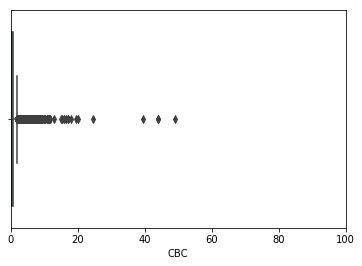

In [330]:
sns.boxplot(df_cannabinoid_test_results['CBC'])
plt.xlim(0, 100)

In [429]:
df_cannabinoid_test_results.dtypes

CBC                        float64
CBCA                       float64
CBD                        float64
CBD Per Package            float64
CBD Per Serving            float64
CBDA                       float64
CBDV                       float64
CBDVA                      float64
CBG                        float64
CBGA                       float64
CBN                        float64
Delta-8-THC                float64
Delta-9-THC                float64
Delta-9-THC Per Package    float64
Delta-9-THC Per Serving    float64
THC                        float64
THC Per Package            float64
THC Per Serving            float64
THCA                       float64
THCA Per Package           float64
THCA Per Serving           float64
THCV                       float64
THCVA                      float64
Total CBD                  float64
Total CBD Per Serving      float64
Total THC                  float64
Total THC Per Package      float64
Total THC Per Serving      float64
THC/CBD             

<h5>Save cannabinoid dataframe</h5>

In [513]:
df_cannabinoid_test_results.to_pickle('./cleaned_cannabinoid_test_results.pkl')

In [496]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('multipage_canna.pdf')

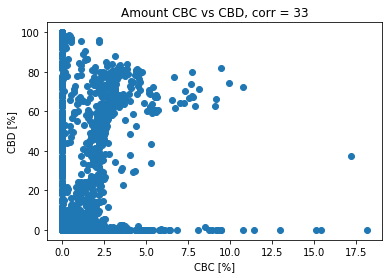

In [498]:
plt.scatter(df_cannabinoid_test_results['CBC'], df_cannabinoid_test_results['CBD'])
fig_size = [7,6]
plt.xlabel('CBC [%]')
plt.ylabel('CBD [%]')
plt.title('Amount CBC vs CBD, corr = 33')
#plt.show()
pp.savefig()
#plt.savefig(pp, format='pdf')
#plt.close()

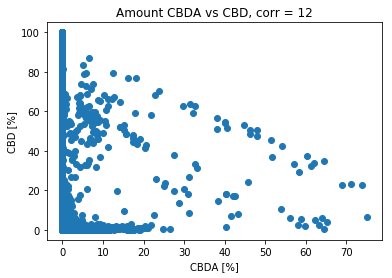

In [499]:
plt.scatter(df_cannabinoid_test_results['CBDA'], df_cannabinoid_test_results['CBD'])
fig_size = [7,6]
plt.xlabel('CBDA [%]')
plt.ylabel('CBD [%]')
plt.title('Amount CBDA vs CBD, corr = 12')
pp.savefig()
#plt.show()
#plt.savefig(pp, format='pdf')

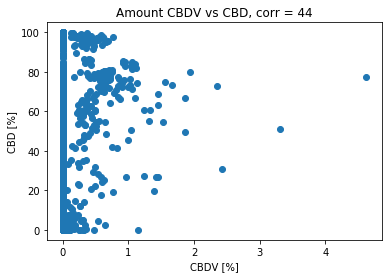

In [500]:
plt.scatter(df_cannabinoid_test_results['CBDV'], df_cannabinoid_test_results['CBD'])
fig_size = [7,6]
plt.xlabel('CBDV [%]')
plt.ylabel('CBD [%]')
plt.title('Amount CBDV vs CBD, corr = 44')
pp.savefig()
#plt.show()
#plt.savefig(pp, format='pdf')

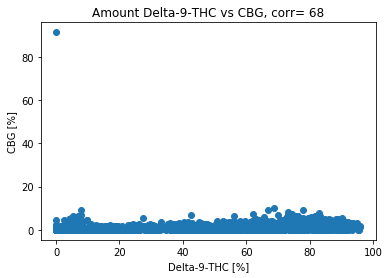

In [501]:
plt.scatter(df_cannabinoid_test_results['Delta-9-THC'], df_cannabinoid_test_results['CBG'])
fig_size = [7,6]
plt.xlabel('Delta-9-THC [%]')
plt.ylabel('CBG [%]')
plt.title('Amount Delta-9-THC vs CBG, corr= 68')
pp.savefig()
#plt.show()
#plt.savefig(pp, format='pdf')

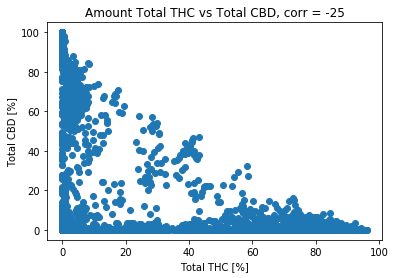

In [502]:
plt.scatter(df_cannabinoid_test_results['Total THC'], df_cannabinoid_test_results['Total CBD'])
fig_size = [7,6]
plt.xlabel('Total THC [%]')
plt.ylabel('Total CBD [%]')
plt.title('Amount Total THC vs Total CBD, corr = -25')
pp.savefig()
#plt.show()
#plt.savefig(pp, format='pdf')

In [436]:
correlations = df_cannabinoid_test_results.corr()

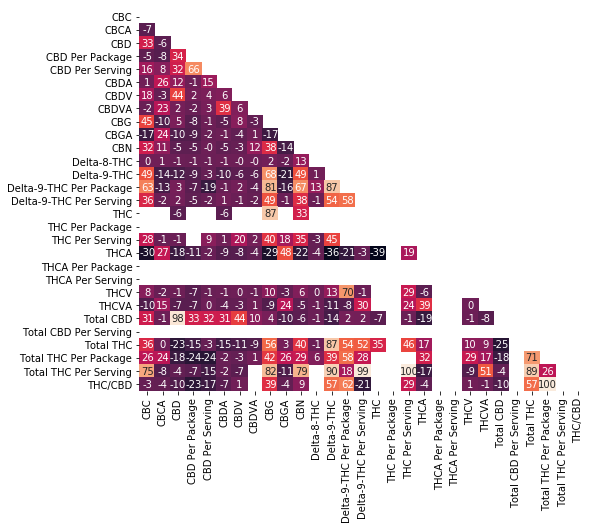

In [497]:
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,7))

corr_heat = sns.heatmap(correlations * 100, annot=True, fmt='.0f', mask=mask, cbar=False)
#plt.savefig(f, format="pdf")
pp.savefig()
#plt.close()


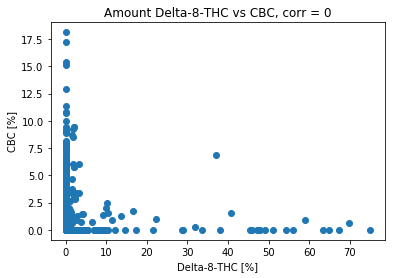

In [503]:
plt.scatter(df_cannabinoid_test_results['Delta-8-THC'], df_cannabinoid_test_results['CBC'])
fig_size = [7,6]
plt.xlabel('Delta-8-THC [%]')
plt.ylabel('CBC [%]')
plt.title('Amount Delta-8-THC vs CBC, corr = 0')
pp.savefig()
#plt.show()
#plt.savefig(pp, format='pdf')

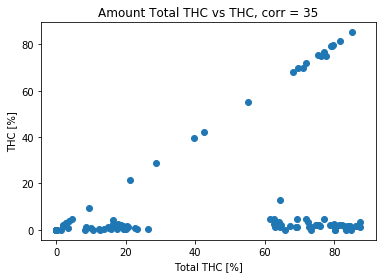

In [504]:
plt.scatter(df_cannabinoid_test_results['Total THC'], df_cannabinoid_test_results['THC'])
fig_size = [7,6]
plt.xlabel('Total THC [%]')
plt.ylabel('THC [%]')
plt.title('Amount Total THC vs THC, corr = 35')
pp.savefig()
#plt.show()
#plt.savefig(pp, format='pdf')

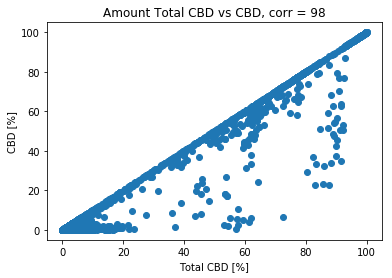

In [505]:
plt.scatter(df_cannabinoid_test_results['Total CBD'], df_cannabinoid_test_results['CBD'])
fig_size = [7,6]
plt.xlabel('Total CBD [%]')
plt.ylabel('CBD [%]')
plt.title('Amount Total CBD vs CBD, corr = 98')
pp.savefig()
plt.show()
#plt.savefig(pp, format='pdf')

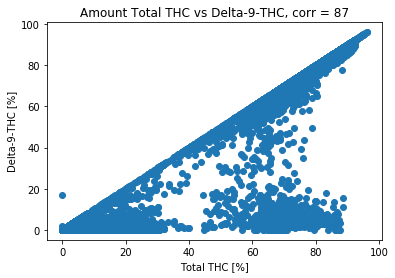

In [506]:
plt.scatter(df_cannabinoid_test_results['Total THC'], df_cannabinoid_test_results['Delta-9-THC'])
fig_size = [7,6]
plt.xlabel('Total THC [%]')
plt.ylabel('Delta-9-THC [%]')
plt.title('Amount Total THC vs Delta-9-THC, corr = 87')
pp.savefig()
plt.show()
#plt.savefig(pp, format='pdf')

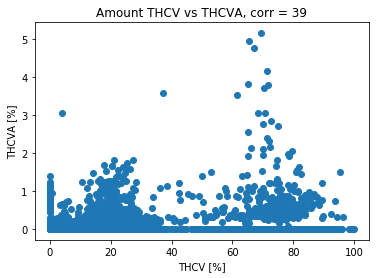

In [507]:
plt.scatter(df_cannabinoid_test_results['THCA'], df_cannabinoid_test_results['THCVA'])
fig_size = [7,6]
plt.xlabel('THCV [%]')
plt.ylabel('THCVA [%]')
plt.title('Amount THCV vs THCVA, corr = 39')
pp.savefig()
plt.show()
#plt.savefig(pp, format='pdf')

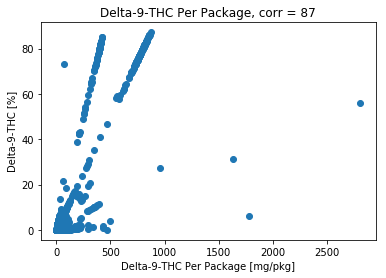

In [508]:
plt.scatter(df_cannabinoid_test_results['Delta-9-THC Per Package'], df_cannabinoid_test_results['Delta-9-THC'])
fig_size = [7,6]
plt.xlabel('Delta-9-THC Per Package [mg/pkg]')
plt.ylabel('Delta-9-THC [%]')
plt.title('Delta-9-THC Per Package, corr = 87')
pp.savefig()
plt.show()
#plt.savefig(pp, format='pdf')

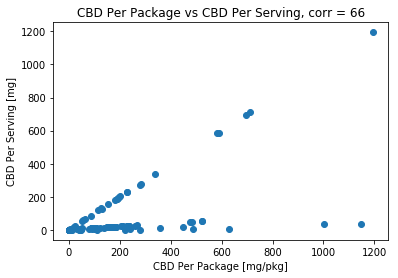

In [509]:
plt.scatter(df_cannabinoid_test_results['CBD Per Package'], df_cannabinoid_test_results['CBD Per Serving'])
fig_size = [7,6]
plt.xlabel('CBD Per Package [mg/pkg]')
plt.ylabel('CBD Per Serving [mg]')
plt.title('CBD Per Package vs CBD Per Serving, corr = 66')
pp.savefig()
plt.show()
#plt.savefig(pp, format='pdf')

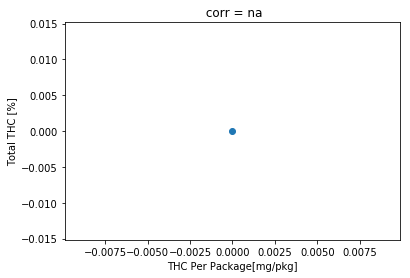

In [510]:
plt.scatter(df_cannabinoid_test_results['THC Per Package'], df_cannabinoid_test_results['Total THC'])
fig_size = [7,6]
plt.xlabel('THC Per Package[mg/pkg]')
plt.ylabel('Total THC [%]')
plt.title(' corr = na')
pp.savefig()
plt.show()
#plt.savefig(pp, format='pdf')

In [511]:
pp.close()

In [ ]:
df_cannabinoid_test_results.columns